In [4]:
from skimage import io, color, data, draw, exposure, feature, filters, measure, morphology, util, segmentation, transform
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as sft
import scipy.signal as sps
from PIL import Image
import cv2 as cv

In [8]:
%load_ext autoreload
%autoreload 2

from source import Helper
h = Helper()

## 1. Equilateral triangle

Load the sticker

Text(0.5, 1.0, 'Sticker in Frequency Domain')

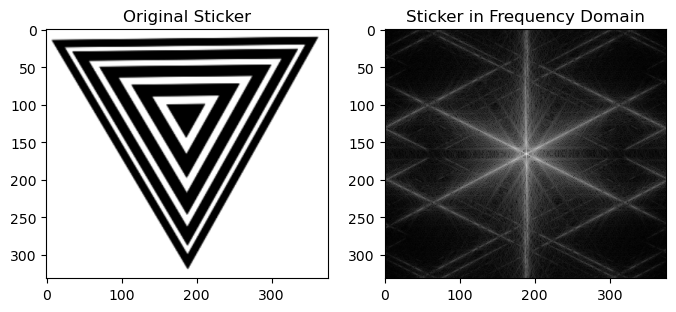

In [9]:
#sticker = np.asarray(Image.open('stickers/triangle.png'))

# Convert from rgba to gray
sticker = io.imread('stickers/triangle.png', as_gray = True)
dft_sticker = h.get_dft(sticker)
dft_sticker = h.get_dft_magnitude(dft_sticker)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(sticker, cmap='gray')
ax1.set_title("Original Sticker")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dft_sticker,  cmap='gray')
ax2.set_title("Sticker in Frequency Domain")


DFT of the sticker:

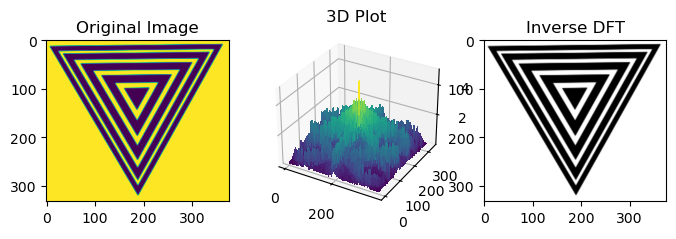

In [4]:
h.display_img(sticker)

Choose a random frame from the video

(960, 1708)

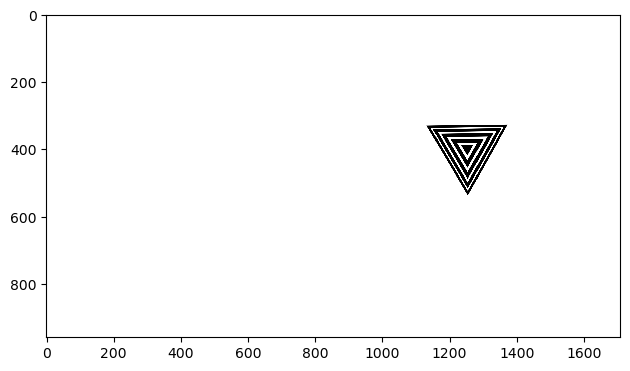

In [5]:
image = io.imread('Zeyi_Draft/test1.png', as_gray=True)
io.imshow(image)
image.shape

Create a 2-D spectrogram of the image

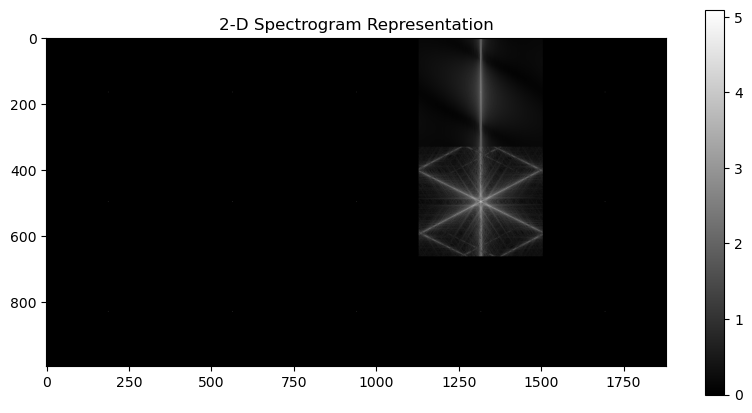

In [6]:
composite_dft = h.create_spectrogram(sticker,image)
h.show_spectrogram(composite_dft, sticker, grid = False)

Use the Spectrogram to find out the location of the sticker

In [7]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)

Best Search Box: 9
Minimum value of MSE: 0.19468504233784487
[0.19468504 0.22369909 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]
[9, 4, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15]


In [8]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 4
Maximum value of SSIM: 0.3887036276006206
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.27163445 0.38870363]
[1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 9, 4]


## Image in between two boxes

(960, 1708)


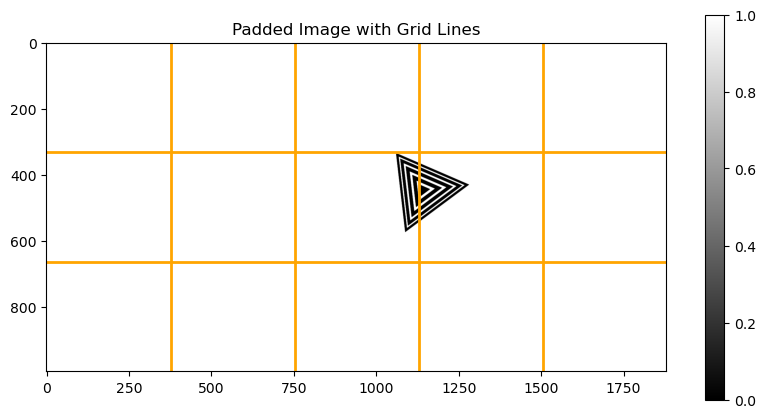

In [58]:
# Load the image
image2 = io.imread('Zeyi_Draft/test2.png', as_gray=True)
#plt.imshow(image2, cmap="gray")
print(image2.shape)
h.show_grid(sticker, image2)

Plot the spectrogram:

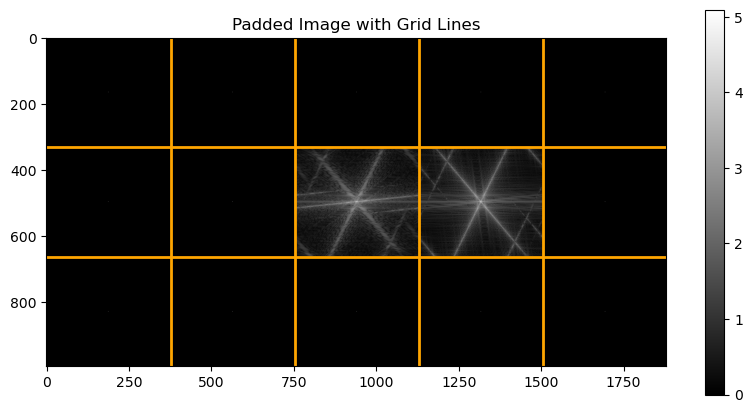

In [10]:
composite_dft = h.create_spectrogram(sticker,image2)
h.show_spectrogram(composite_dft,sticker, grid = True)

Find the location:

In [11]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 8
Minimum value of MSE: 0.3359191792027657
[8, 9, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15]
[0.33591918 0.33643704 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196 0.66818196
 0.66818196 0.66818196 0.66818196]


In [12]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image2)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 8
Maximum value of SSIM: 0.1984997071419692
[0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.0215692  0.0215692  0.0215692  0.0215692  0.0215692
 0.0215692  0.19361346 0.19849971]
[1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 9, 8]


Recursive Search

(480, 854, 960, 1708)


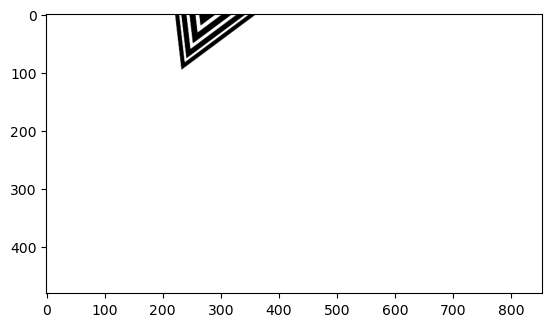

In [101]:
bound = (0, 0, image2.shape[0], image2.shape[1])
selected_part, selected_bounds = h.find_location_recursive(sticker, image2, bound)
plt.imshow(selected_part, cmap = 'gray')
print(selected_bounds)

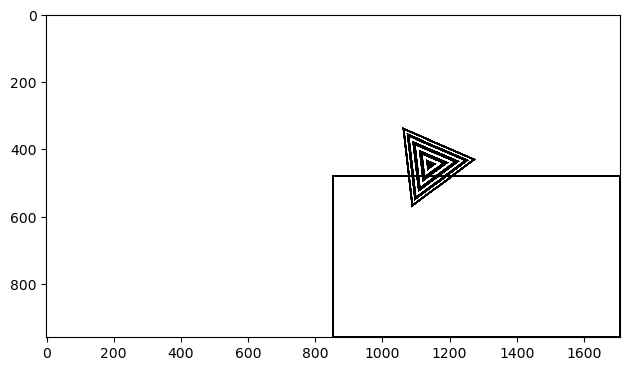

In [102]:
y,x,_,_ = selected_bounds
h.draw_bounding_box(selected_part,image2, (y,x))

Sliding Window Search

In [14]:
position,best_match_box = h.find_location_sliding_window(sticker, image2, step_x = 20, step_y = 20)
print(sticker.shape)
print(position)
y,x = position

(332, 376)
(560, 740)


/Users/sallyliu/opt/anaconda3/envs/csci0452/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


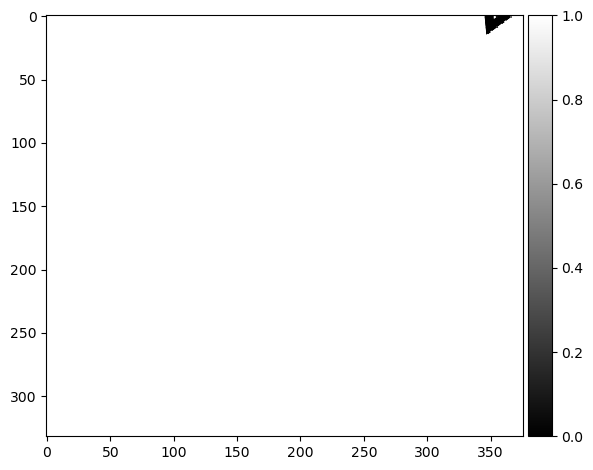

In [15]:
io.imshow(best_match_box, cmap='gray')

Draw a bounding box

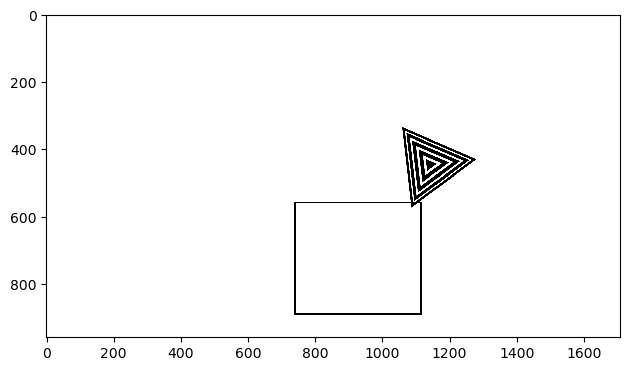

In [16]:
h.draw_bounding_box(sticker,image2,position)

Spatial Domain

(0, 0, 480, 854)


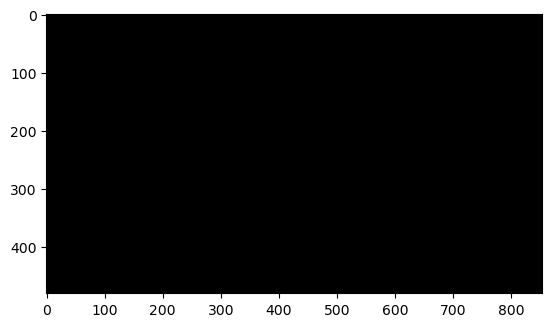

In [74]:
bound = (0, 0, image2.shape[0], image2.shape[1])
selected_part, selected_bounds = h.find_location_recursive_spatial(sticker, image2, bound)
plt.imshow(selected_part, cmap = 'gray')
print(selected_bounds)

In [75]:
position,best_match_box = h.find_location_sliding_window_spatial(sticker, image2, step = 20)
print(sticker.shape)
print(position)

(332, 376)
(340, 960)


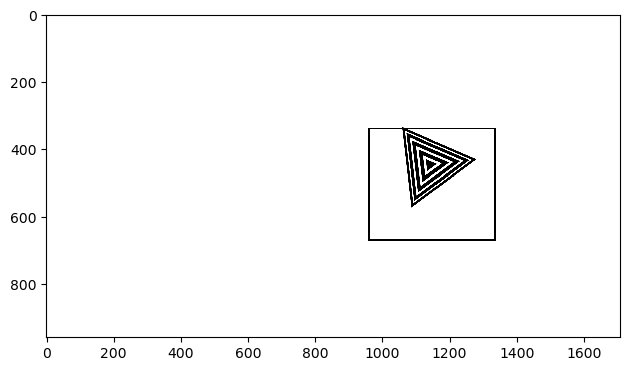

In [76]:
h.draw_bounding_box(sticker,image2,position)

## Triangle with noisy background

Load the image

(960, 1708)


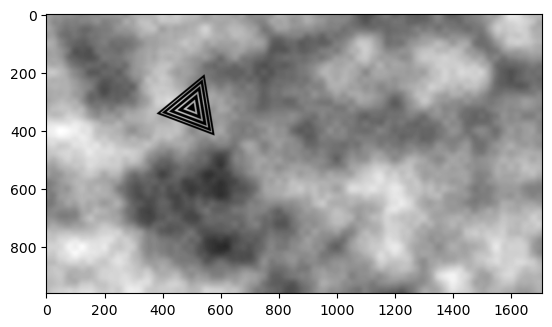

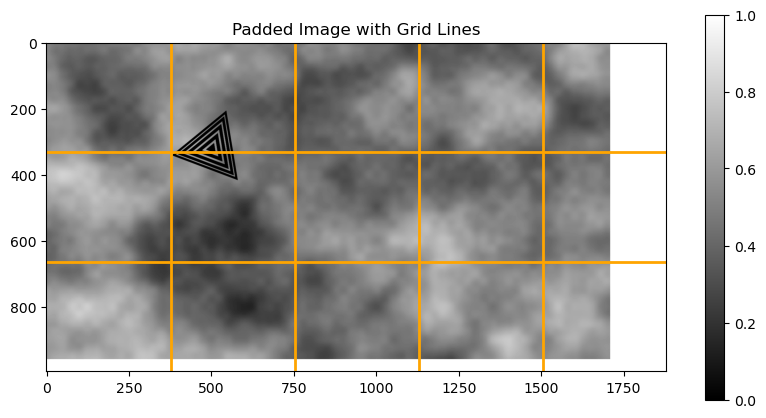

In [62]:
image3 = io.imread('Zeyi_Draft/test3.png', as_gray=True)
plt.imshow(image3, cmap="gray")
print(image3.shape)
h.show_grid(sticker, image3)

Create spectrogram of the image

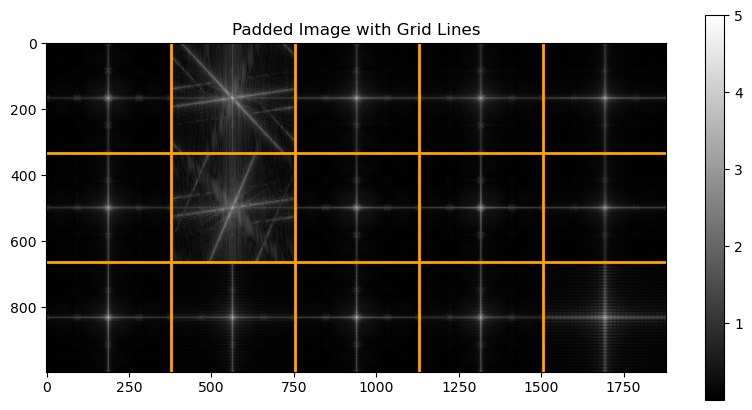

In [18]:
composite_dft = h.create_spectrogram(sticker,image3)
h.show_spectrogram(composite_dft,sticker,grid = True)

Find the location of the sticker

In [19]:
best_box, min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_mse)
print(sorted_box_idx)


Best Search Box: 7
Minimum value of MSE: 0.22969897112790896
[0.22969897 0.24355343 0.30087037 0.37337531 0.39806222 0.40038912
 0.40250065 0.40338619 0.41604833 0.42040486 0.43279719 0.43620555
 0.43695415 0.43735583 0.43939014]
[7, 2, 15, 12, 3, 4, 6, 14, 5, 11, 13, 10, 8, 1, 9]


In [20]:
best_box, max_ssim, sorted_box_idx, sorted_ssim = h.find_location_ssim(sticker,image3)
print(f'Best Search Box: {best_box}')
print(f'Maximum value of SSIM: {max_ssim}')
print(sorted_ssim)
print(sorted_box_idx)

Best Search Box: 15
Maximum value of SSIM: 0.2748510806783566
[0.15776656 0.15790769 0.16160803 0.16282395 0.1688581  0.173302
 0.1843355  0.18570611 0.18667666 0.18899074 0.19286689 0.21712528
 0.23339452 0.23576056 0.27485108]
[1, 9, 8, 13, 10, 11, 5, 3, 14, 6, 4, 12, 7, 2, 15]


Recursive Search

(0, 0, 480, 854)


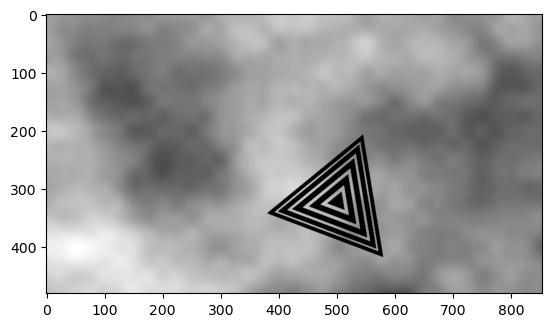

In [103]:
bound = (0, 0, image3.shape[0], image3.shape[1])
selected_part, selected_bounds = h.find_location_recursive(sticker, image3, bound)
plt.imshow(selected_part, cmap="gray")
print(selected_bounds)

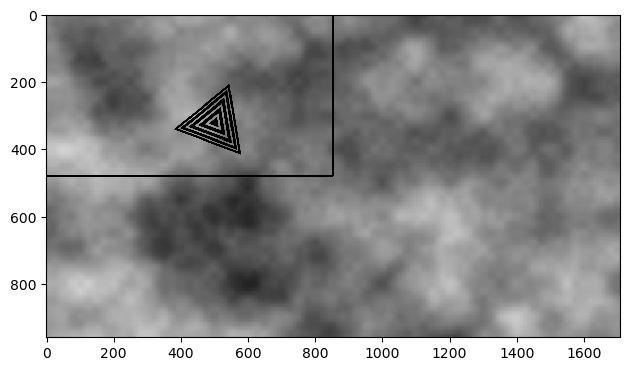

In [104]:
y,x,_,_ = selected_bounds
h.draw_bounding_box(selected_part,image3, (y,x))

Sliding Window Search

In [22]:
position,best_match_box = h.find_location_sliding_window(sticker, image3, step_x = 20, step_y= 20)
print(sticker.shape)
print(position)
y,x = position

(332, 376)
(60, 520)


Draw bounding box

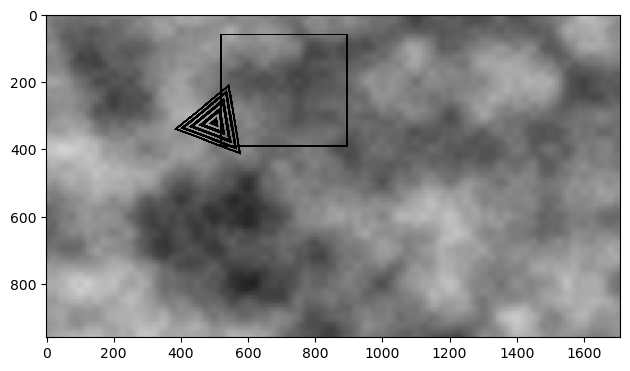

In [23]:
h.draw_bounding_box(sticker,image3,position)

Spatial Domain

(480, 854, 960, 1708)


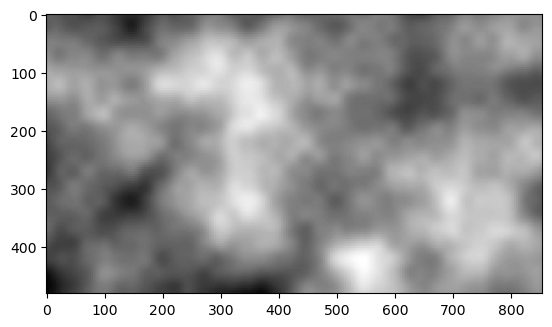

In [71]:
bound = (0, 0, image3.shape[0], image3.shape[1])
selected_part, selected_bounds = h.find_location_recursive_spatial(sticker, image3, bound)
plt.imshow(selected_part, cmap="gray")
print(selected_bounds)

In [65]:
position,best_match_box = h.find_location_sliding_window_spatial(sticker, image3, step = 20)
print(sticker.shape)
print(position)
y,x = position

(332, 376)
(160, 20)


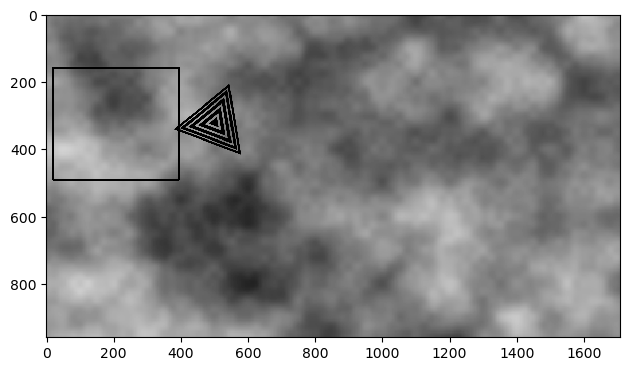

In [66]:
h.draw_bounding_box(sticker,image3,position)

View Spectrogram as video

In [24]:
import view_spectrogram as view
#view.view_spectrogram(sticker, 'noisy_triangles')

### Right Triangle

Text(0.5, 1.0, 'Sticker in Frequency Domain')

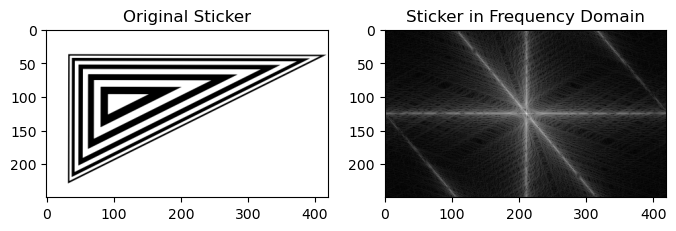

In [33]:
sticker4 = io.imread("stickers/right_triangle.png", as_gray = True)
sticker4.shape
dft_sticker4 = h.get_dft(sticker4)
dft_sticker4 = h.get_dft_magnitude(dft_sticker4)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(sticker4, cmap='gray')
ax1.set_title("Original Sticker")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(dft_sticker4,  cmap='gray')
ax2.set_title("Sticker in Frequency Domain")

Load the image

(800, 1600)


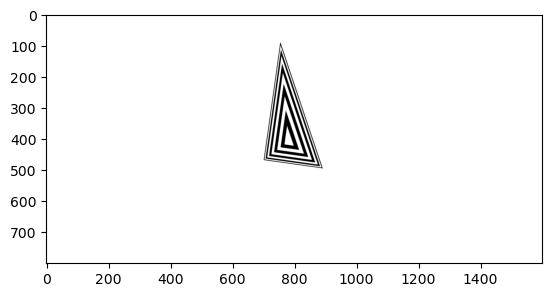

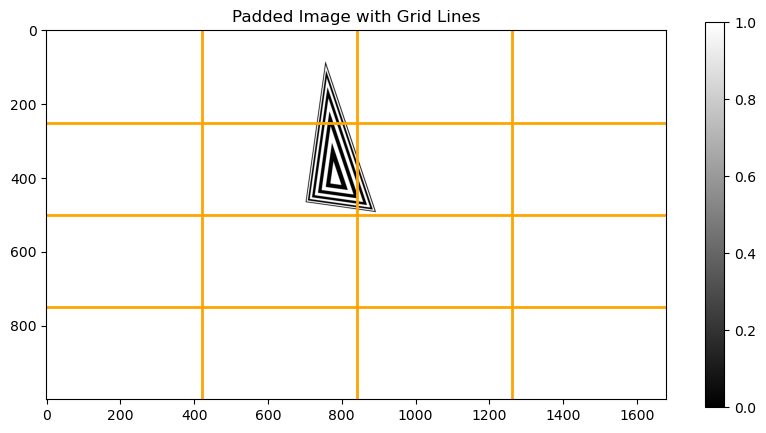

In [34]:
image4 = io.imread("rotating_30_60_90_chirps_video/vid_30_60_90_chirp_sticker-2.png", as_gray = True)
plt.imshow(image4, cmap="gray")
print(image4.shape)
h.show_grid(sticker4, image4)

Draw Spectrogram

<class 'numpy.ndarray'>


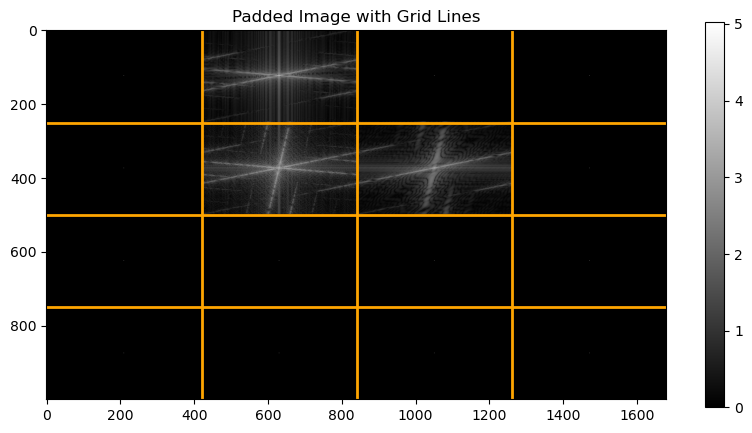

In [35]:
composite_dft = h.create_spectrogram(sticker4,image4)
print(type(composite_dft))
h.show_spectrogram(composite_dft, sticker4, grid = True)

Find box location

In [36]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image4)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 7
Minimum value of MSE: 0.2138595048068092
[7, 2, 6, 1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0.2138595  0.21956775 0.26347376 0.66352839 0.66352839 0.66352839
 0.66352839 0.66352839 0.66352839 0.66352839 0.66352839 0.66352839
 0.66352839 0.66352839 0.66352839 0.66352839]


Recursive Search

(400, 400, 600, 800)


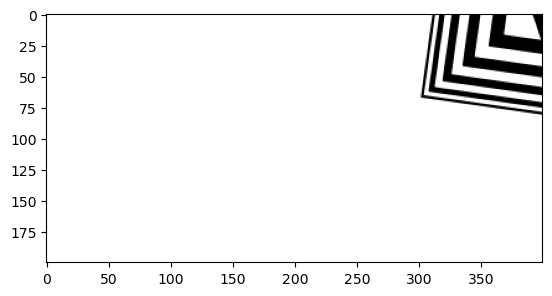

In [37]:
bound = (0, 0, image4.shape[0], image4.shape[1])
selected_part, selected_bounds = h.find_location_recursive(sticker4, image4, bound)
plt.imshow(selected_part, cmap = 'gray')
print(selected_bounds)

Sliding window search

In [30]:
position,best_match_box = h.find_location_sliding_window(sticker4, image4, step_x = 20, step_y = 20)
print(sticker4.shape)
print(position)
y,x = position

(250, 420)
(460, 380)


Draw Bounding Box

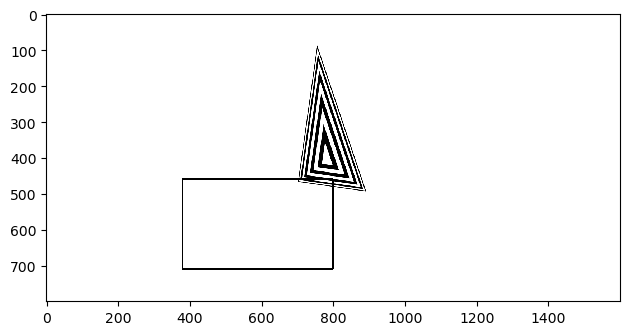

In [31]:
h.draw_bounding_box(sticker4,image4,position)

Spatial Domain

(0, 800, 400, 1600)


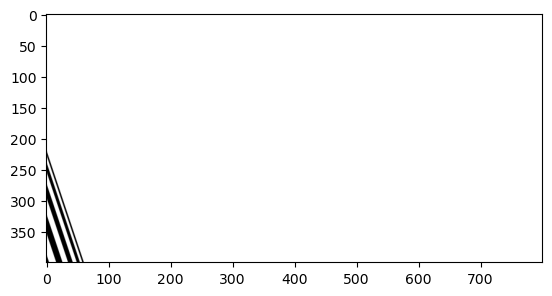

In [77]:
bound = (0, 0, image4.shape[0], image4.shape[1])
selected_part, selected_bounds = h.find_location_recursive_spatial(sticker4, image4, bound)
plt.imshow(selected_part, cmap = 'gray')
print(selected_bounds)

In [67]:
position,best_match_box = h.find_location_sliding_window_spatial(sticker4, image4, step = 20)
print(sticker4.shape)
print(position)
y,x = position

(250, 420)
(480, 360)


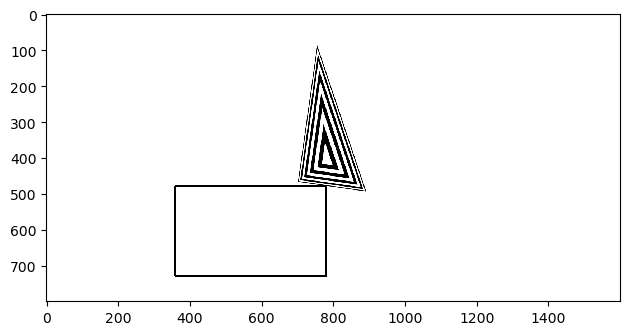

In [68]:
h.draw_bounding_box(sticker4,image4,position)

## Changing Background

(720, 1200)


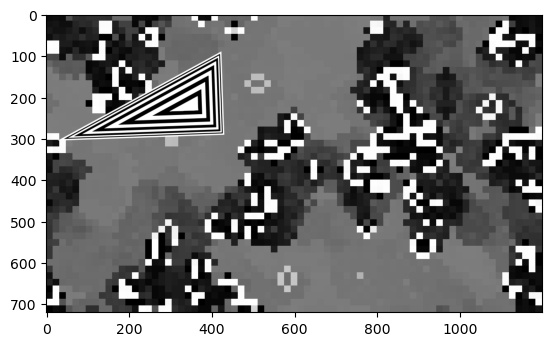

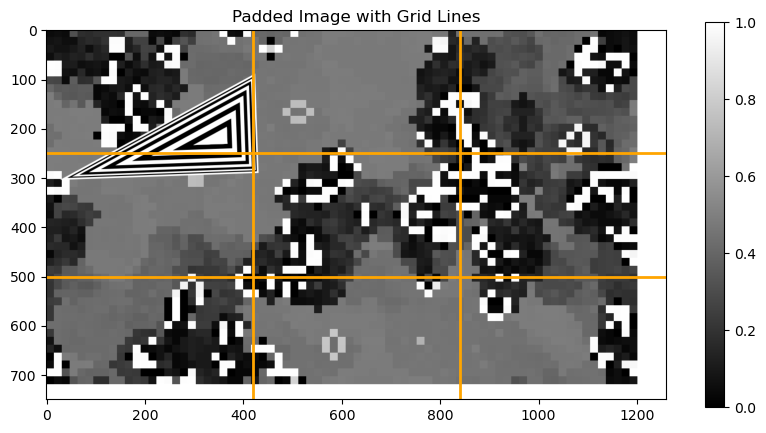

In [32]:
image5 = io.imread("gol_background_30_60_90_vid/vid_30_60_90_gol-9.png", as_gray=True)
plt.imshow(image5, cmap="gray")
print(image5.shape)
h.show_grid(sticker4, image5)

Create spectrogram

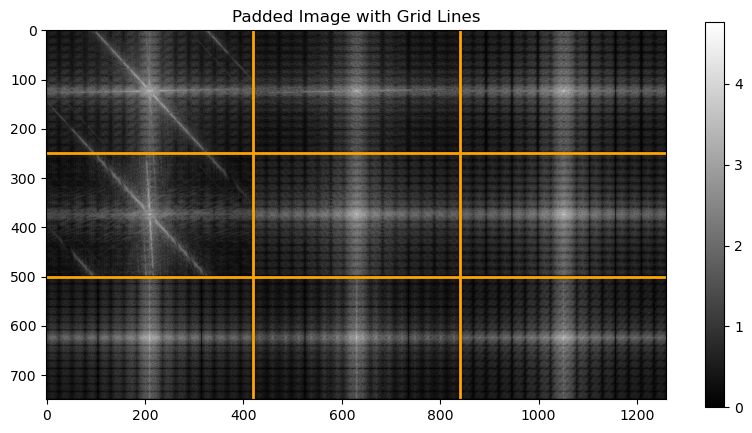

In [33]:
composite_dft = h.create_spectrogram(sticker4,image5)
h.show_spectrogram(composite_dft, sticker4, grid = True)


Find the location of the sticker

In [34]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(sticker4,image5)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 4
Minimum value of MSE: 0.1458090907744969
[4, 8, 2, 9, 7, 3, 1, 5, 6]
[0.14580909 0.16715555 0.17392301 0.18693198 0.21425258 0.2300178
 0.23094906 0.25514709 0.2708567 ]


Recursive Search

(360, 0, 720, 600)


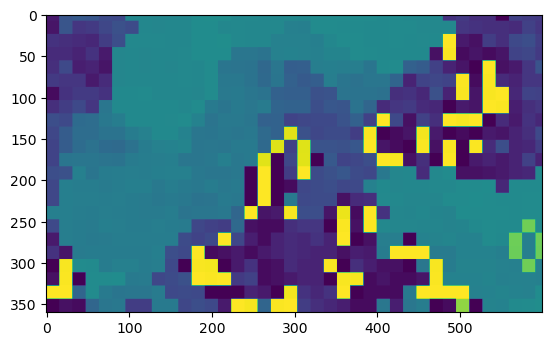

In [35]:
bound = (0, 0, image5.shape[0], image5.shape[1])
selected_part, selected_bounds = h.find_location_recursive(sticker4, image5, bound)
plt.imshow(selected_part)
print(selected_bounds)

View the Spectrogram as video

In [36]:
import view_spectrogram as view
#view.view_spectrogram(sticker4,'rotating_30_60_90_chirps_video')

Sliding Window Search

In [37]:
position,best_match_box = h.find_location_sliding_window(sticker4, image5, step_x= 20, step_y = 20)
print(sticker4.shape)
print(position)
y,x = position

(250, 420)
(240, 40)


Draw Bounding Box

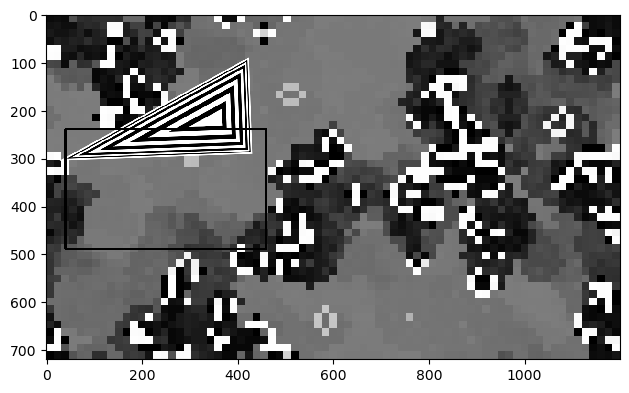

In [38]:
h.draw_bounding_box(sticker4,image5,position)

Spatial Domain

(0, 0, 360, 600)


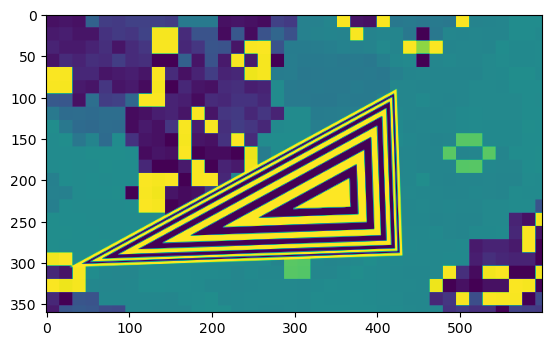

In [78]:
bound = (0, 0, image5.shape[0], image5.shape[1])
selected_part, selected_bounds = h.find_location_recursive_spatial(sticker4, image5, bound)
plt.imshow(selected_part)
print(selected_bounds)

(250, 420)
(0, 320)


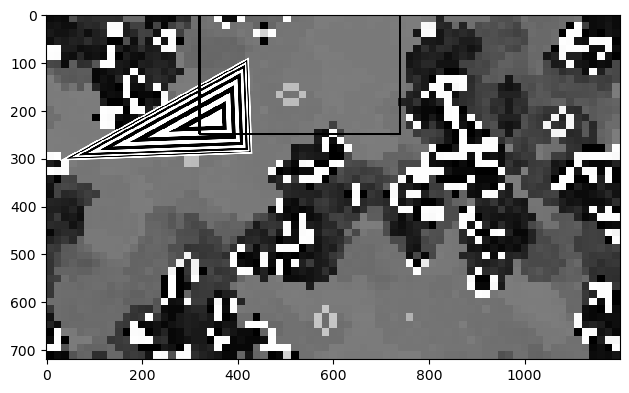

In [70]:
position,best_match_box = h.find_location_sliding_window_spatial(sticker4, image5, step = 20)
print(sticker4.shape)
print(position)
y,x = position
h.draw_bounding_box(sticker4,image5,position)

## Real Life Images

### Circle Sticker

(400, 400)


Text(0.5, 1.0, 'Sticker in Frequency Domain')

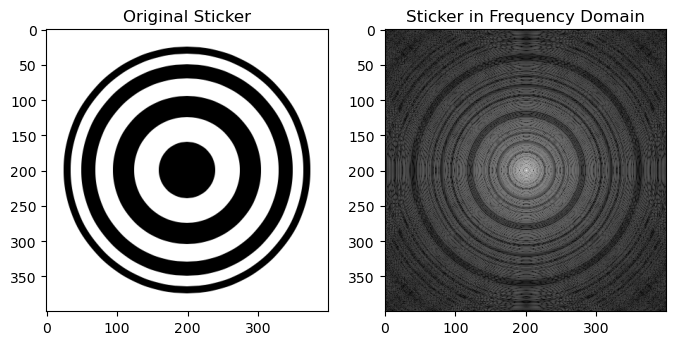

In [26]:
circle_sticker = io.imread("stickers/circle_400_400.png", as_gray = True)
print(circle_sticker.shape)
circle_sticker_dft = h.get_dft(circle_sticker)
circle_sticker_dft = h.get_dft_magnitude(circle_sticker_dft)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(circle_sticker, cmap='gray')
ax1.set_title("Original Sticker")
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(circle_sticker_dft,  cmap='gray')
ax2.set_title("Sticker in Frequency Domain")

In [40]:
sticker_resize =  resize(circle_sticker,(400,400),anti_aliasing = True)
#io.imshow(sticker_resize)

Load Real Life Image

float64
(1080, 1920)


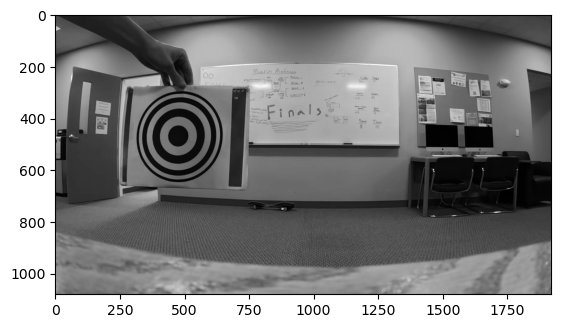

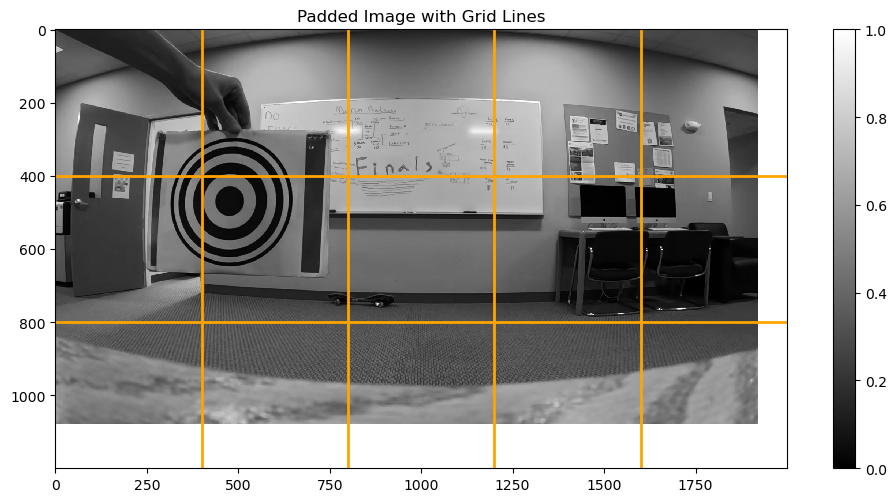

In [27]:
image = io.imread("real_life_videos/circle_frame_0004.png", as_gray=True)
plt.imshow(image, cmap="gray")
print(image.dtype)
print(image.shape)
h.show_grid(circle_sticker, image)
_,_,padded_img = h.pad_image(circle_sticker, image)
io.imshow(padded_img)

Spectrogram

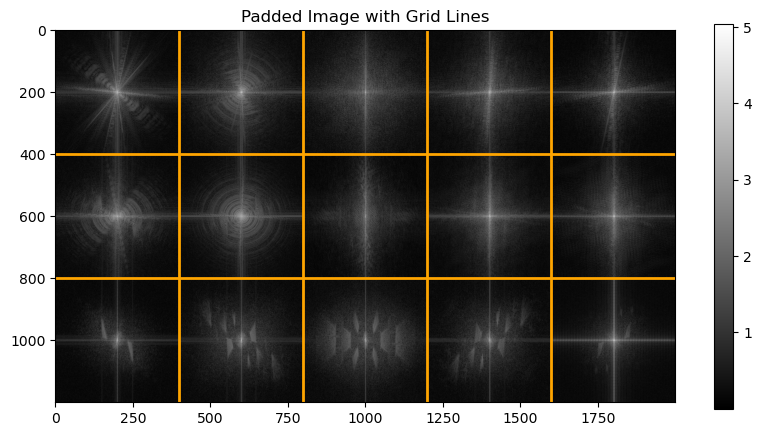

In [28]:
composite_dft = h.create_spectrogram(circle_sticker,image)
h.show_spectrogram(composite_dft, circle_sticker, grid = True)


Find target box

In [29]:
best_box,min_mse, sorted_box_idx, sorted_mse = h.find_location_mse(circle_sticker,image)
print(f'Best Search Box: {best_box}')
print(f'Minimum value of MSE: {min_mse}')
print(sorted_box_idx)
print(sorted_mse)

Best Search Box: 3
Minimum value of MSE: 0.5167207499568021
[3, 2, 7, 6, 13, 4, 9, 1, 10, 12, 14, 8, 5, 15, 11]
[0.51672075 0.52104669 0.55530028 0.5661915  0.57181118 0.58011817
 0.59896342 0.61842237 0.62669529 0.65376061 0.70262546 0.7230566
 0.7607569  0.8264994  0.89357027]


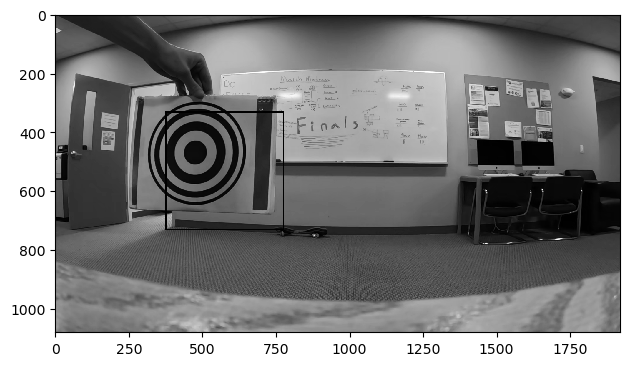

In [30]:
best_position, best_match_box = h.find_location_sliding_window(circle_sticker,image, step_x = sticker.shape[1], step_y = sticker.shape[0])
h.draw_bounding_box(circle_sticker, image,best_position)

Recursive Search

(0, 0, 540, 960)


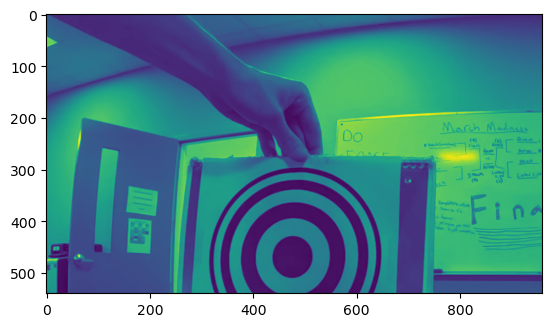

In [19]:
bound = (0, 0, image.shape[0], image.shape[1])
selected_part, selected_bounds = h.find_location_recursive(circle_sticker, image, bound)
plt.imshow(selected_part)
print(selected_bounds)

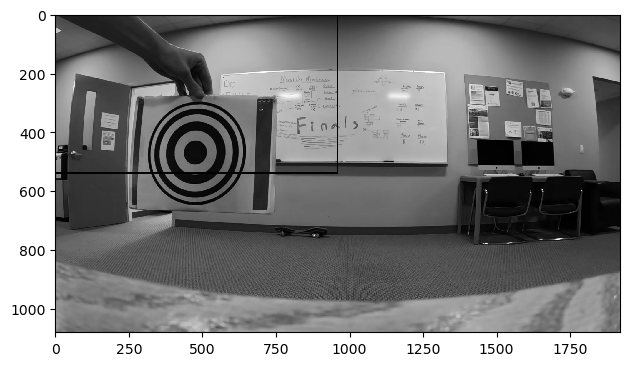

In [20]:
y,x,_,_ = selected_bounds
h.draw_bounding_box(selected_part, image, (y,x))

Sliding Window Search

In [21]:
position,best_match_box = h.find_location_sliding_window(circle_sticker, image, step_x= 20, step_y = 20)
print(sticker.shape)
print(position)
y,x = position

(332, 376)
(220, 500)


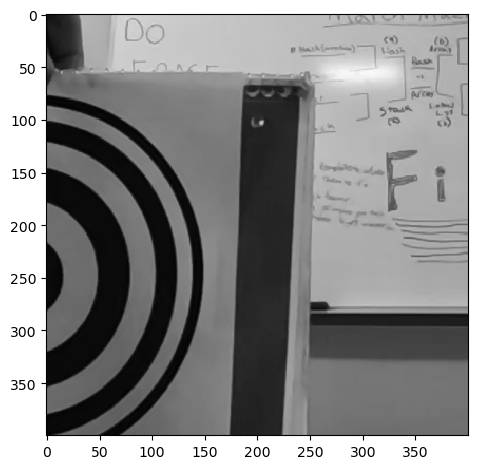

In [22]:
io.imshow(best_match_box)
#io.imshow(image4[y:y+sticker4.shape[0],x:x+sticker4.shape[1]])

Draw a Bounding Box

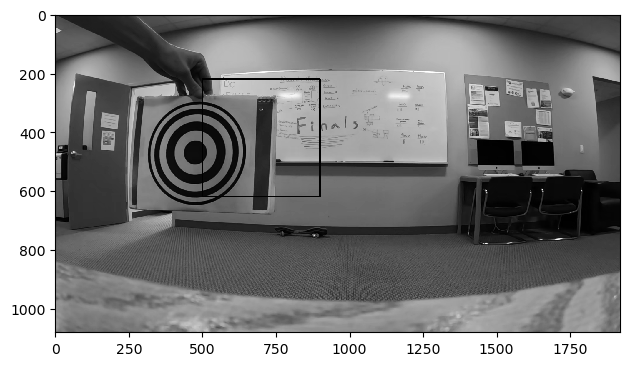

In [23]:
h.draw_bounding_box( circle_sticker, image,position)

Spatial Domain

In [24]:
position,best_match_box = h.find_location_sliding_window_spatial(circle_sticker, image, step = 20)
print(sticker.shape)
print(position)
y,x = position

(332, 376)
(100, 760)


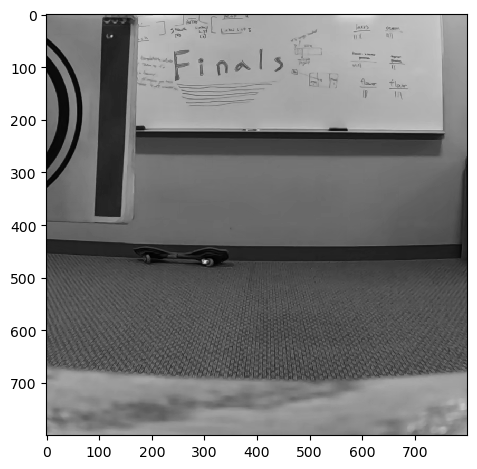

In [53]:
io.imshow(best_match_box)

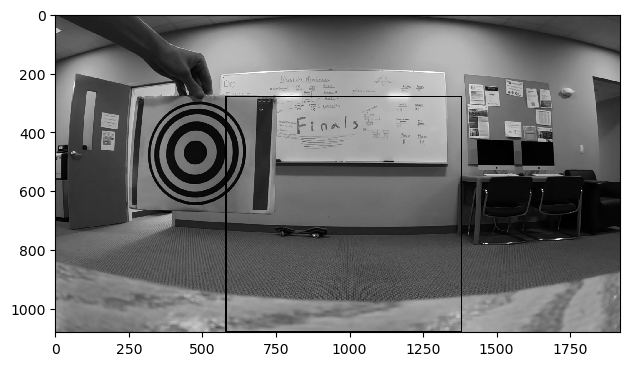

In [54]:
y,x = position
top_left = (y,x)
img = image.copy()
bottom_right = (y + circle_sticker.shape[0],x + circle_sticker.shape[1])
image_window = cv.rectangle(img, (x,y), (x + circle_sticker.shape[1],y + circle_sticker.shape[0]), (0,255,0), 4)
io.imshow(image_window)

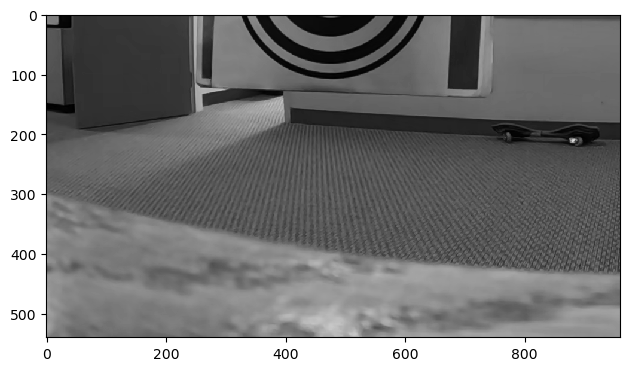

In [51]:
bound = (0, 0, image.shape[0], image.shape[1])
selected_part, selected_bounds = h.find_location_recursive_spatial(circle_sticker, image, bound)
io.imshow(selected_part)

## Template Matching

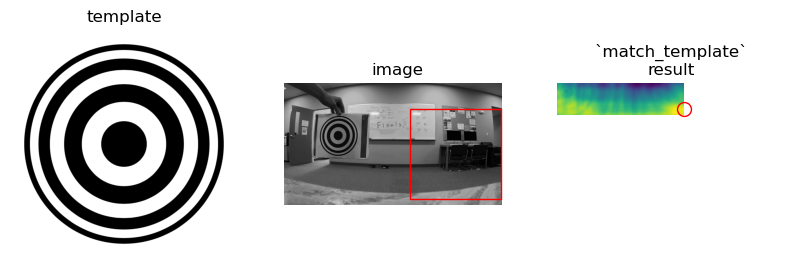

In [79]:
h.template_matching(image, circle_sticker)

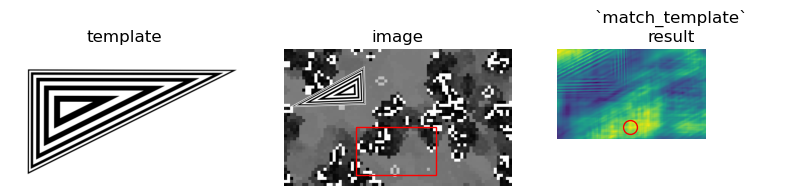

In [82]:
h.template_matching(image5, sticker4)

float64
(1080, 1920)


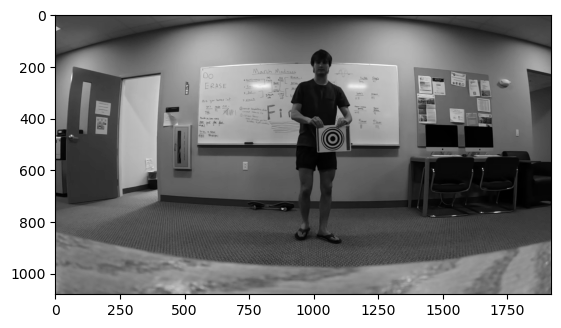

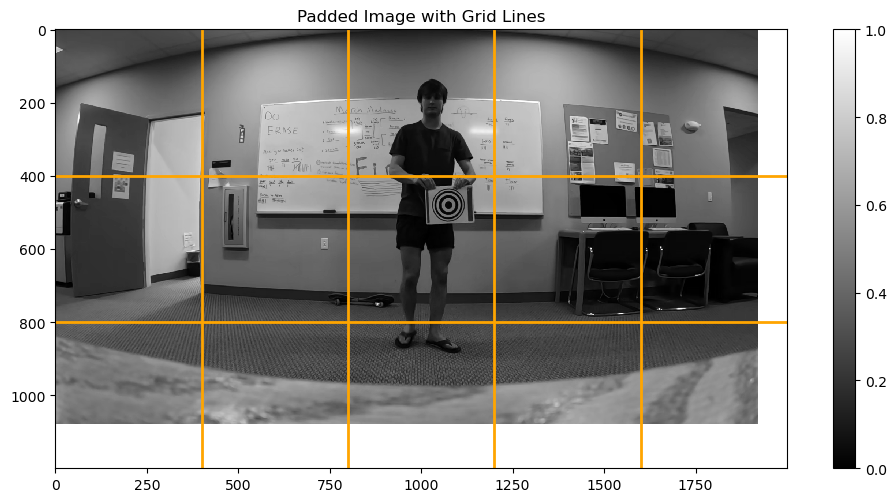

In [25]:
image = io.imread("real_life_videos/circle_frame_0248.png", as_gray=True)
plt.imshow(image, cmap="gray")
print(image.dtype)
print(image.shape)
h.show_grid(circle_sticker, image)
_,_,padded_img = h.pad_image(circle_sticker, image)
io.imshow(padded_img)

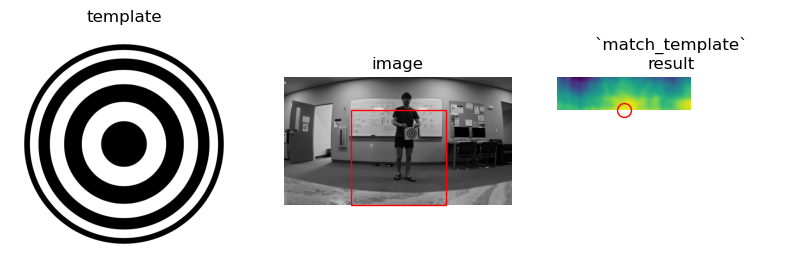

In [84]:
h.template_matching(image, circle_sticker)

### Calculate Run-time


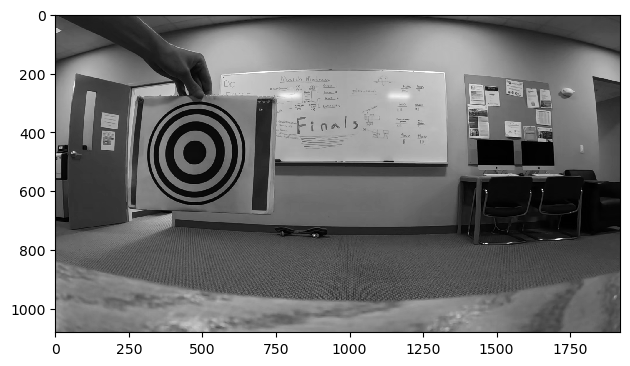

In [48]:
img = io.imread("video_circle/frame_0000.png", as_gray = True)
io.imshow(img, cmap= "gray")

Non-overlapping Search

In [49]:
import time
start_time = time.time()

best_position, best_match_box = h.find_location_sliding_window(circle_sticker,img, step_x = circle_sticker.shape[1], step_y = circle_sticker.shape[0])
end_time = time.time()  # capture end time
elapsed_time = end_time - start_time  # compute elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.0566098690032959 seconds


Overlapping Search with step = 50

In [53]:
start_time = time.time()
position,best_match_box = h.find_location_sliding_window(circle_sticker, img, step_x= 50, step_y = 50)
end_time = time.time()  # capture end time
elapsed_time = end_time - start_time  # compute elapsed time
print(f"Elapsed time: {elapsed_time} seconds")


Elapsed time: 0.6746740341186523 seconds


Recursive Grid Search

In [54]:
start_time = time.time()
bound = (0, 0, img.shape[0], img.shape[1])
selected_part, selected_bounds = h.find_location_recursive(circle_sticker, img, bound)
end_time = time.time()  # capture end time
elapsed_time = end_time - start_time  # compute elapsed time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.2995109558105469 seconds
